#### Data Analysis on CSV Files — **Salary & Jobs Dataset**

**Objective:** Analyze data using Pandas and produce clear charts and insights.  
**Tools:** Python, Pandas, Jupyter Notebook/Colab, Matplotlib  
**Deliverables:** Notebook + Charts + Short insights under each chart

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("ds_salaries.csv")
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

In [4]:
df.head() #top 5

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [13]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [8]:
df.describe() #Descriptive stats for numeric columns

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

In [9]:
print(df.isnull().sum()) #check mising values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [10]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values") #goes for unique values

Unnamed: 0: 607 unique values
work_year: 3 unique values
experience_level: 4 unique values
employment_type: 4 unique values
job_title: 50 unique values
salary: 272 unique values
salary_currency: 17 unique values
salary_in_usd: 369 unique values
employee_residence: 57 unique values
remote_ratio: 3 unique values
company_location: 50 unique values
company_size: 3 unique values


In [14]:
salary_by_year = df.groupby("work_year")["salary_in_usd"].mean()
salary_by_year                       #Group by work_year (salary trend)

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

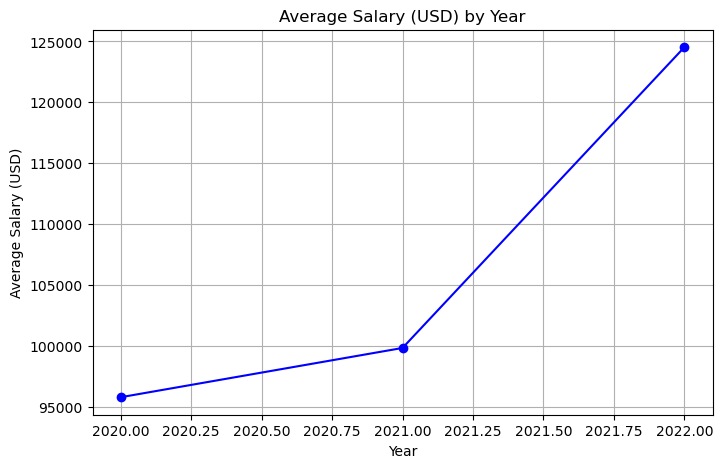

In [17]:
plt.figure(figsize=(8,5))
salary_by_year.plot(kind="line", marker="o", color="blue")
plt.title("Average Salary (USD) by Year")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

In [18]:
exp_salary_trend = df.groupby(["work_year", "experience_level"])["salary_in_usd"].mean().unstack()
exp_salary_trend              #Group by work_year & experience_level

experience_level            EN             EX            MI             SE
work_year                                                                 
2020              63648.600000  202416.500000  85950.062500  137240.500000
2021              59101.021277  223752.727273  85490.088889  126596.188406
2022              65423.428571  178313.846154  91193.956044  143043.398964

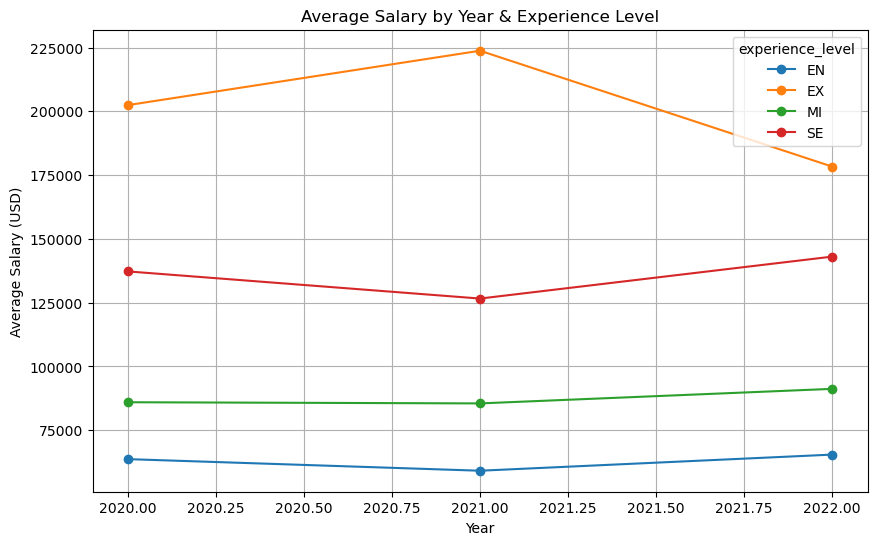

In [19]:
exp_salary_trend.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Average Salary by Year & Experience Level")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

In [21]:
top_jobs = df["job_title"].value_counts().head(5).index
job_trend = df[df["job_title"].isin(top_jobs)].groupby(["work_year","job_title"])["salary_in_usd"].mean().unstack()
print(top_jobs)
print(job_trend)                     #Group by work_year & job_title (top 5 jobs only)

Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object')
job_title   Data Analyst  Data Engineer  Data Scientist  \
work_year                                                 
2020        45547.285714   88162.000000    85970.523810   
2021        79505.411765   83202.531250    70671.733333   
2022       100550.739726  126375.696629   136172.090909   

job_title  Machine Learning Engineer  Research Scientist  
work_year                                                 
2020                   125389.800000            246000.0  
2021                    74611.222222             83003.6  
2022                   129451.944444            105569.0  


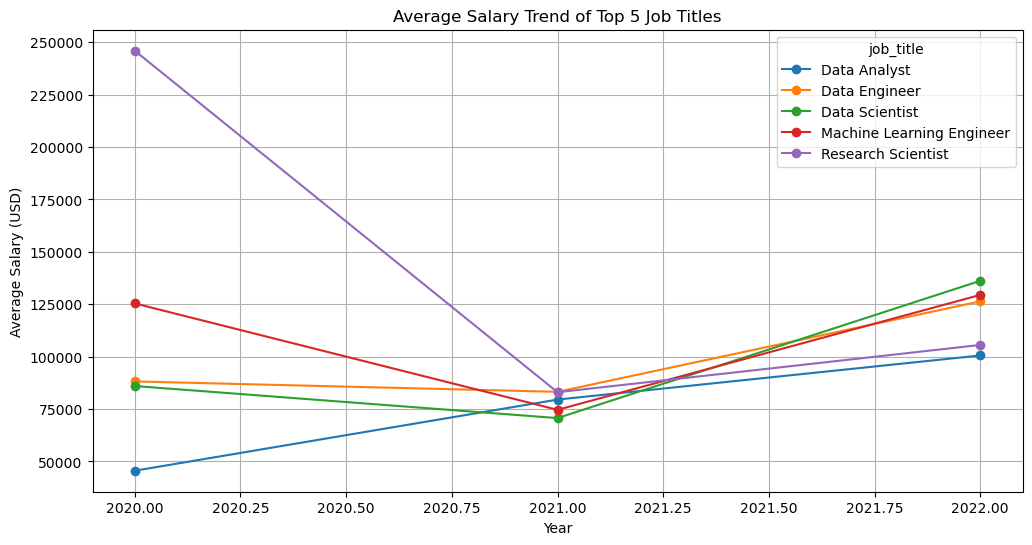

In [22]:
job_trend.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Average Salary Trend of Top 5 Job Titles")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

**Conclusion:** Salaries generally rise with time, experience, and company size. Job roles and remote work trends highlight evolving industry demands and workplace flexibility.